<a href="https://colab.research.google.com/github/mohamadmansourX/TreeBased_Carla/blob/main/MNIST_Benchmark_Carla_Wrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO list:


1. Save benchmarks the whole data to csv.
2. 

LeafNode ---> merge_conditions

if both has '<=' we sould choose the min value but its not working unless we choose max??? same to '>'

Notes:

AutoEncoder:

1. Wasn't performing well on our dataset. Increasing the layers were suffienct to allow the encoder to be able to learn the latent representations of our dataset. (Better loss)

2. Needed as well to increase the bottleneck size a little to be suffiecient to represent our dataset (This can be clearly visualized now with the nearest neighbors plot)

3. 

In [1]:
!git clone https://<PAT>@github.com/<username>/TreeBased_Carla.git
%cd TreeBased_Carla

Cloning into 'TreeBased_Carla'...
remote: Enumerating objects: 565, done.
remote: Counting objects: 100% (565/565), done.
remote: Compressing objects: 100% (482/482), done.
remote: Total 565 (delta 113), reused 488 (delta 63), pack-reused 0
Receiving objects: 100% (565/565), 7.03 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/TreeBased_Carla


In [2]:
!gdown 1f6WkbtbiCWnwURrTutNmYvjbCpvKhBTy

Downloading...
From: https://drive.google.com/uc?id=1f6WkbtbiCWnwURrTutNmYvjbCpvKhBTy
To: /content/TreeBased_Carla/mnist_28.csv
100% 18.3M/18.3M [00:00<00:00, 48.1MB/s]


In [3]:
!git reset --hard d9dd5740b54384e869b3fd48c82f52fb4ab39a93
!git pull

fatal: Could not parse object 'd9dd5740b54384e869b3fd48c82f52fb4ab39a93'.
Already up to date.


In [4]:
!git checkout d9dd5740b54384e869b3fd48c82f52fb4ab39a93

fatal: reference is not a tree: d9dd5740b54384e869b3fd48c82f52fb4ab39a93


In [5]:
!pip install pynndescent==0.5.7 -q

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [6]:
%%bash
echo """pip install -U pip setuptools wheel -q
pip install -e . -q
""" > mm_bash_setup.sh

In [7]:
!bash mm_bash_setup.sh

     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 46.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3

In [12]:
!pip install scikit_learn==1.0.2 -q
!pip install numpy==1.21.6 -q
!pip install scipy==1.7.3 -q
!pip install -r requirements-dev.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 47.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.
fastai 2.7.7 requires torchvision>=0.8.2, but you have torchvision 0.8.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 35.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.7.0 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.6.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.
google-colab 1.0.0 requi

In [14]:
!pip install -r requirements-dev.txt -q

In [15]:
import pynndescent

# Initializing the Model

In [1]:
%cd /content/TreeBased_Carla

/content/TreeBased_Carla


In [2]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import warnings


warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import contextlib
import torch
import tensorflow as tf
import numpy as np
import random
import os
import torch
import tensorflow as tf
import numpy as np
import random
import sklearn
import xgboost
import os
import pandas as pd
import warnings

import pandas as pd

from carla.data.api import data
import numpy as np
import torch
torch.cuda.is_available = lambda : False
import yaml
from typing import Dict, List
from cote.data_specific import DataModels
from carla import Benchmark
import pandas as pd
from carla.recourse_methods import (
    CCHVAE,
    CEM,
    CRUD,
    FOCUS,
    ActionableRecourse,
    CausalRecourse,
    Clue,
    Dice,
    Face,
    FeatureTweak,
    GrowingSpheres,
    Revise,
    Wachter,
)
from carla.recourse_methods.catalog.causal_recourse import constraints, samplers
import carla.evaluation.catalog as evaluation_catalog
from cote.TreeResource import TreeBasedContrastiveExplanation
from vae_benchmark import VAEBenchmark

warnings.filterwarnings('ignore')
def seed_my_session(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  tf.set_random_seed(42)
  sklearn.random_state = seed
  os.environ['PYTHONHASHSEED'] = str(seed)
seed_my_session()

Using TensorFlow backend.


[INFO] Using Python-MIP package version 1.12.0 [model.py <module>]
[INFO] NumExpr defaulting to 2 threads. [utils.py _init_num_threads]


In [3]:
from typing import Dict, List, Tuple, Union
import pandas as pd
from carla import RecourseMethod
from carla.data.api import data, Data
from carla.models.api import MLModel
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import torch
import numpy as np
from carla import Benchmark
from carla.recourse_methods import Dice, Face
import warnings
warnings.simplefilter("ignore", UserWarning)
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [5]:
import yaml
def load_setup() -> Dict:
    with open("experimental_setup.yaml", "r") as f:
        setup_catalog = yaml.safe_load(f)
    return setup_catalog["recourse_methods"]
setup = load_setup()

In [4]:
"""
Tree Leaf utils
"""

import enum
from typing import Dict, List, Tuple, Union
import pandas as pd
from carla import RecourseMethod
from carla.data.api import data, Data
from carla.models.api import MLModel
from carla.recourse_methods.autoencoder import (
    VariationalAutoencoder,
    train_autoencoder,
)
from carla.recourse_methods.processing import (
    check_counterfactuals,
    merge_default_parameters,
    reconstruct_encoding_constraints,
)
# For Descision Tree implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import torch
import numpy as np
from carla import Benchmark
from carla.recourse_methods import Dice, Face
import warnings
warnings.simplefilter("ignore", UserWarning)
import numpy as np
import random
from sklearn.model_selection import train_test_split
from copy import deepcopy
class LeafNode:
    def __init__(self, conditions, label, weight):
        # Conditions is a list of tuples from the root node to the leaf node
        self.conditions = deepcopy(conditions)
        # Label is the label of the leaf node
        self.label = label
        # Wieght Either entropy or gini
        self.weight = weight
        # Duplicate conditions
        self.duplicate_conditions = []

    def __repr__(self):
        """
        Print the leaf node with conditions and label
        """
        return "LeafNode(label={}, weight={}, conditions={})".format(self.label, self.weight, self.conditions)

    def compare_node(self, other): #TODO misleading name
        """
        Get the distance between two leaf nodes by returning a set of conditions as follows:
        1. Initialize conditions as other conditions
        2. Remove conditions that are exactly the same with self
        3. Return the remaining conditions

        # TODO common feature
        """
        # Initialize conditions as other conditions
        conditions = other.conditions
        # Remove conditions that are common with self
        for condition in self.conditions:
            conditions = [c for c in conditions if c != condition]
        # Return the remaining conditions
        return conditions

    def merge_conditions(self):
        """
        If there are two conditions with the same feature and threshold_sign, merge them into one condition
        """
        # Initialize conditions as other conditions
        # 
        conditions = self.conditions
        # indexes to be dropped
        indexes = []
        # Search for conditions with the same feature and threshold_sign
        for i in range(len(conditions)):
            # if i in the indexes to be dropped, skip
            if i in indexes:
                continue
            for j in range(i + 1, len(conditions)):
                # if j in the indexes to be dropped, skip
                if j in indexes:
                    continue
                if conditions[i].feature == conditions[j].feature:
                    if conditions[i].threshold_sign == conditions[j].threshold_sign:
                        # Merge the two conditions
                        if conditions[i].threshold_sign == '<=':
                            conditions[i].threshold = min(conditions[i].threshold, conditions[j].threshold)
                        else:
                            conditions[i].threshold = max(conditions[i].threshold, conditions[j].threshold)
                        # Add index to drop
                        indexes.append(j)
                    else:
                        # Add it to duplicate conditions
                        if conditions[j].feature not in self.duplicate_conditions:
                            self.duplicate_conditions.append(conditions[j].feature)
        # Drop indexes from conditions
        conditions = [c for i, c in enumerate(conditions) if i not in indexes]
        self.conditions = conditions
        self.duplicate_conditions = list(set(self.duplicate_conditions))

    def check_point(self, point):
        """
        Check if the point satisfies the conditions of the leaf node
        """
        # Check if the point satisfies the conditions of the leaf node
        for condition in self.conditions:
            if not condition.check_point(point):
                return False
        return True

    def generate_point(self, point, data_catalog = None, sigma =0.5, gamma = 0):
        """
        Generate a point from a point
        """
        # loop through the duplicate conditions
        for feature in self.duplicate_conditions:
            # get the two conditions with that feature
            conditions = [c for c in self.conditions if c.feature == feature]
            # data_catalog contains {'categorical':[],'continuous':[],'imutable':[], 'continuous_stats':[]}
            if feature in data_catalog['categorical']:
                # Assert that there shouldn't be duplicate conditions for a binary feature (categorical here are binaries)
                assert False, "There shouldn't be duplicate conditions for a binary feature"
                #TODO (general user he can't solve it)
                # Thrsh can be continous, then generate a random point between threshold and round the result
            elif feature in data_catalog['continuous']:
                # using the continuous_stats get the std and mean
                std = data_catalog['continuous_stats'][feature]['std']
                mean = data_catalog['continuous_stats'][feature]['mean']
                minn = data_catalog['continuous_stats'][feature]['min']
                maxx = data_catalog['continuous_stats'][feature]['max']
                # Using the mean, std, min and max create a bias value
                # bias values is std/10 * (max - min)
                bias = std / sigma # TOCHECK LATER
                bias = min(bias, abs(conditions[0].threshold - conditions[1].threshold))
                # Min
                if gamma == 0:
                    min_bias = 0
                else:
                    min_bias = std / gamma
                # Generate a random value between the two thresholds
                bias = random.uniform(min_bias, bias)
                # Add the bias to the threshold
                if conditions[0].threshold_sign == '<=':
                    point[feature] = conditions[0].threshold + bias
                else:
                    point[feature] = conditions[1].threshold + bias
        for condition in self.conditions:
            if condition.feature not in self.duplicate_conditions:
                if condition.feature in data_catalog['categorical']:
                    # Simply flip the value
                    # Round the threshold
                    point[condition.feature] = not point[condition.feature]
                else: # condition.feature in data_catalog['continuous']:
                    std = data_catalog['continuous_stats'][condition.feature]['std']
                    mean = data_catalog['continuous_stats'][condition.feature]['mean']
                    minn = data_catalog['continuous_stats'][condition.feature]['min']
                    maxx = data_catalog['continuous_stats'][condition.feature]['max']
                    bias = std / sigma
                    # Min
                    if gamma == 0:
                        min_bias = 0
                    else:
                        min_bias = std / gamma
                    # Generate a random value between the two thresholds
                    bias = random.uniform(min_bias, bias)
                    if condition.threshold_sign == '<=':
                        point[condition.feature] = condition.threshold + bias
                    else:
                        point[condition.feature] = condition.threshold - bias
        return point


class Condition:
    def __init__(self, feature, threshold, threshold_sign):
        # Feature is the feature name
        self.feature = feature
        # Value is the value of the feature
        self.threshold = threshold
        # <= or > since they are the only two threshold_sign in Decision Tree
        self.threshold_sign = threshold_sign
    def __repr__(self):
        return f'{self.feature} {self.threshold_sign} {self.threshold}'
    def check_point(self, point):
        """
        Check if the point satisfies the condition
        """
        # Check if the point satisfies the condition
        if self.threshold_sign == '<=':
            return point[self.feature] <= self.threshold
        else:
            return point[self.feature] > self.threshold


class TreeLeafs:
    def __init__(self, tree, feature_input_order):
        self.tree = tree
        self.feature_input_order = feature_input_order
        self.leafs_nodes = []
        self.get_leaf_nodes(tree)
        for leaf in self.leafs_nodes:
            leaf.merge_conditions()

    def get_leaf_nodes(self, tree, node_id=0, conditions=[]):
        """
        This will be a recursion function that will append to leaf_nodes list, their labels and set of conditions
        If the node is a leaf node, then it will append a LeafNode object to leaf_nodes
        If the node is not a leaf node, then it will return while adding the conditions of the left and right child to the list
        """
        # If the node is a leaf node
        if tree.children_left[node_id] == -1 and tree.children_right[node_id] == -1:
            # Append the leaf node to the list
            self.leafs_nodes.append(LeafNode(conditions, np.argmax(tree.value[node_id]), tree.impurity[node_id]))
        # If the node is not a leaf node
        else:
            # Need to get the feature of the node
            feature = self.feature_input_order[tree.feature[node_id]]
            # Need to get the threshold of the node
            threshold = tree.threshold[node_id]
            # For right child if exists, threshold_sign is >
            if tree.children_right[node_id] != -1:
                conditions_right = conditions.copy()
                # Append the condition to the list
                conditions_right.append(Condition(feature, threshold, '>'))
                # Get the right child
                self.get_leaf_nodes(tree, tree.children_right[node_id], conditions_right)
            # For left child if exists, threshold_sign is <=
            if tree.children_left[node_id] != -1:
                conditions_left = conditions.copy()
                # Append the condition to the list
                conditions_left.append(Condition(feature, threshold, '<='))
                # Get the left child
                self.get_leaf_nodes(tree, tree.children_left[node_id], conditions_left)


In [119]:
from tqdm.notebook import tqdm
from pynndescent import NNDescent
import enum
from typing import Dict, List, Tuple, Union
import pandas as pd
from carla import RecourseMethod
from carla.data.api import data, Data
from carla.models.api import MLModel
from carla.recourse_methods.autoencoder import (
    train_variational_autoencoder
)
from carla.recourse_methods.processing import (
    check_counterfactuals,
    merge_default_parameters,
    reconstruct_encoding_constraints,
)
# For Descision Tree implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import torch
import numpy as np
from carla import Benchmark
from carla.recourse_methods import Dice, Face
import numpy as np
import random
from sklearn.model_selection import train_test_split
from copy import deepcopy
from carla import MLModelCatalog
from carla.data.catalog import OnlineCatalog
from carla.recourse_methods import GrowingSpheres
from sklearn.model_selection import GridSearchCV, train_test_split
tqdm.pandas()


class TreeBasedContrastiveExplanation(RecourseMethod):
    '''
    Decision Tree Based contrastive explanations
    '''
    _DEFAULT_HYPERPARAMS = {
      "data_name": None,
      "n_search_samples": 300,
      "p_norm": 1,
      "step": 0.1,
      "max_iter": 1000,
      "clamp": True,
      "target_class": [0, 1],
      "binary_cat_features": True,
      "myvae_params": {
          'input_dim': 784,
          'kld_weight': 0.0025,
          'layers': [512, 128],
          'latent_dim': 32,
          'hidden_activation': 'relu',
          'dropout': 0.2,
          'batch_norm': True,
          'batch_size': 64,
          'epochs': 20,
          'learning_rate': 0.001,
          'weight_decay': 0.0,
          'cuda': False,
          'verbose': True,
          'train': True,
          'save_dir': './vae_model/',
      },
      "tree_params": {
          "min_entries_per_label": 1000,
          "grid_search_jobs": -1,
          "min_weight_gini": 100, # set to 0.5 since here both class have same prob
          "max_search": 500,
          "grid_search": {
                "splitter": ["best"],
                "criterion": ["gini"],
                "max_depth": [6],
                "min_samples_split": [2],
                "min_samples_leaf": [1],
                "max_features": [None] #Note changing this will result in removing features that we might want to keep
          }
      }

    }

    def __init__(self, dataset:Data, mlmodel: MLModel, hyperparams: Dict, data_catalog: Dict, distance_metric ='euclidean'):
        super().__init__(mlmodel)
        self.distance_metric = distance_metric
        # Construct catalog
        self.data_catalog = data_catalog
        # Construct mlmodel
        self.mlmodel = mlmodel
        # Construct the hyperparameters
        self.hyperparams = merge_default_parameters(hyperparams, self._DEFAULT_HYPERPARAMS)
        # Construct the VAE
        # self.vae = TEMP_VAE
        self.vae = self.load_vae(dataset, self.hyperparams["myvae_params"], mlmodel, mlmodel.data.name)
        # Construct the dataframe with encodings
        self.dataset = dataset.df
        self.dataset['VAE_ENCODED'] = self.get_encodeings(self.dataset.copy())
        # Load Grid Parameters
        self.hyperparams["tree_params"]["grid_search"] = self.optimize_grid(self.hyperparams["tree_params"]["grid_search"], self.dataset)
        ## These are added to optimize neighbor sampling for DT which used to take ~0.4 seconds and now will be 
        # NNDescent
        self.data_indexes_m = self.dataset.index
        self.set_distance_metric_initialize_nn(self.distance_metric)

    '''def set_distance_metric_initialize_nn(self, distance_metric):
        self.distance_metric = distance_metric
        self.nnd = NNDescent(np.array(self.dataset["VAE_ENCODED"].values.tolist()), metric=self.distance_metric,random_state=42)
        self.nnd.prepare()'''

    def set_distance_metric_initialize_nn(self, distance_metric):
        self.distance_metric = distance_metric
        self.nnd = NNDescent(np.array(self.dataset["VAE_ENCODED"].values.tolist()), metric=self.distance_metric,random_state=42)
        self.nnd.prepare()
        self.nnd_positive = NNDescent(np.array(self.dataset[self.dataset[self._mlmodel.data.target]==1]["VAE_ENCODED"].values.tolist()), metric=self.distance_metric,random_state=42)
        self.nnd_positive.prepare()
        self.nnd_negative = NNDescent(np.array(self.dataset[self.dataset[self._mlmodel.data.target]==0]["VAE_ENCODED"].values.tolist()), metric=self.distance_metric,random_state=42)
        self.nnd_negative.prepare()

    def set_model(self,mlmodel):
        self._mlmodel = mlmodel
        self.mlmodel = mlmodel
    def optimize_grid(self, grid_search, df):
        """
        Optimize the grid search parameters
        #@TODO: make it on chunkc of the dataframe and return the top
        #@TODO: the chunkcs in order of encodings
        """
        # Define Decision Tree Classifier
        dec_tree = DecisionTreeClassifier(random_state=0)
        # Define Grid Search
        grid_search = GridSearchCV(dec_tree, grid_search, cv=5, n_jobs=self.hyperparams["tree_params"]["grid_search_jobs"])
        target_values = df[self._mlmodel.data.target]
        train_features = df[self._mlmodel.feature_input_order]
        # Fit the Grid Search
        grid_search.fit(train_features, target_values)
        # Return the best parameters as the format of grid_search
        print(grid_search.best_params_)
        return grid_search.best_params_

    def load_vae(
        self, data: pd.DataFrame, vae_params: Dict, mlmodel: MLModel, data_name: str
    ) -> VariationalAutoencoder:
        '''
        Load and train the VAE if needed
        '''
        mutable_list = mlmodel.get_mutable_mask() 
        # Change all False to True in mutable_list
        mutable_list = np.array([True for x in mutable_list])
        generative_model = VariationalAutoencoder(
            data_name, vae_params["layers"], mutable_list, self.hyperparams['myvae_params']
        )
        print(generative_model)
        if vae_params["train"]:
            generative_model.fit(
                xtrain=data.df[mlmodel.feature_input_order]
            )
        else:
            try:
                generative_model.load(vae_params["layers"][0])
            except FileNotFoundError as exc:
                raise FileNotFoundError(
                    "Loading of Autoencoder failed. {}".format(str(exc))
                )

        return generative_model

    def get_counterfactuals(self, factuals: pd.DataFrame):
        '''
        this property is responsible to generate and output
        encoded and scaled counterfactual examples
        as pandas DataFrames
        '''
        # Get the encoded features of factuals
        factuals["VAE_ENCODED"] = self.get_encodeings(factuals)
        # Get the counterfactuals
        # find counterfactuals
        counter_factuals = factuals.apply(
            lambda x: self.tree_based_search(x), axis=1, raw=False
        )
        # counter_factuals = [self.tree_based_search(row) for __,row in factuals.iterrows()]
        # Concatenate the counterfactuals to a single dataframe
        # counter_factuals is a list of rows
        self.counter_factuals = counter_factuals
        #counter_factuals = check_counterfactuals(self._mlmodel, counter_factuals)
        # Return the counterfactuals
        return counter_factuals[self._mlmodel.feature_input_order]

    def get_encodeings(self, data: pd.DataFrame):
        '''
        This method is responsible to append the encoded features
        to the dataframe
        '''
        # Fix DataFrame to be able to feed to the VAE
        input_data = data.copy()[self._mlmodel.feature_input_order]
        encoded_values = self.vae.get_encodings(input_data)
        encoded_values = [i for i in encoded_values]
        return encoded_values

    def distance_get(self, x,factuals):
        return np.square((x - factuals)).sum()

    def get_nearest_neighbors_thershold(self, copy_data, label_threshold):
        '''
        This method is responsible to get the nearest neighbors of a given threshold
        using the VAE and minimum threshold per label
        '''
        # Find the index of the 100th instance of each class
        id_100th_class_0 = copy_data[copy_data[self._mlmodel.data.target] == 0].index[label_threshold-1]
        id_100th_class_1 = copy_data[copy_data[self._mlmodel.data.target] == 1].index[label_threshold-1]
        # Get the maximum id
        max_id = max(id_100th_class_0, id_100th_class_1)
        # Return the nearest neighbors of the 100th instance of each class
        return copy_data.head(max_id)
    
    def decision_tree(self, nearest_neighbors):
        '''
        This method is responsible to create a decision tree
        using the nearest neighbors of the 100th instance of each class
        '''
        target_values = nearest_neighbors[self._mlmodel.data.target]
        train_features = nearest_neighbors[self._mlmodel.feature_input_order]
        # Create the decision tree
        clf = DecisionTreeClassifier(random_state=0 , max_depth=self.hyperparams["tree_params"]['grid_search']["max_depth"], 
                                    min_samples_split=self.hyperparams["tree_params"]['grid_search']["min_samples_split"], 
                                    min_samples_leaf=self.hyperparams["tree_params"]['grid_search']["min_samples_leaf"], 
                                    max_features=self.hyperparams["tree_params"]['grid_search']["max_features"])
        # Define the grid search
        #grid_search = GridSearchCV(clf, self.hyperparams["tree_params"]["grid_search"], cv=5, verbose=0, refit=True, n_jobs=self.hyperparams["tree_params"]["grid_search_jobs"])
        # Fit the grid search evaluate on X_test and y_test then refit best model on the whole dataset
        #grid_search.fit(train_features, target_values)
        # Return the best model
        #return grid_search.best_estimator_
        clf.fit(train_features, target_values)
        return clf

    def tree_based_search(self, factual):
        '''
        This method is responsible to get the counterfactual of a given targeted_encoding
        '''
        copy_data = self.dataset.copy()
        #index_neighbors_0 = self.nnd.query(np.array([factual["VAE_ENCODED"].tolist()]), k=self.hyperparams["tree_params"]["min_entries_per_label"]*2.5)[0][0].tolist()
        #datata_index_0 = self.data_indexes_m[index_neighbors_0].tolist()
        index_neighbors_0 = self.nnd_negative.query(np.array([factual["VAE_ENCODED"].tolist()]), k=self.hyperparams["tree_params"]["min_entries_per_label"])[0][0].tolist()
        datata_index_0 = self.data_indexes_m[index_neighbors_0].tolist()
        index_neighbors_1 = self.nnd_positive.query(np.array([factual["VAE_ENCODED"].tolist()]), k=self.hyperparams["tree_params"]["min_entries_per_label"])[0][0].tolist()
        datata_index_1 = self.data_indexes_m[index_neighbors_1].tolist()
        datata_index_0.extend(datata_index_1)
        nearest_neighbors = copy_data.loc[datata_index_0]
        self.nnb = nearest_neighbors
        # Get the tree
        tree = self.decision_tree(nearest_neighbors)
        self.mtree = tree
        # Get the leaf nodes
        leaf_nodes = TreeLeafs(tree.tree_, self._mlmodel.feature_input_order).leafs_nodes.copy()
        # leaf_nodes is list of classes LeafNode
        # Get the leaf node where the targeted encoding is located
        leaf_node_n_i = -1
        for leaf_i in range(len(leaf_nodes)):
            if leaf_nodes[leaf_i].check_point(factual):
                leaf_node_n_i = leaf_i
                break
        self.mleaf_node_n_i = leaf_node_n_i
        self.mfactual = factual
        # assert if the leaf node is not found
        assert leaf_node_n_i != -1, "Leaf node not found"
        # For now change leafnode label to the item label
        # #assert if leaf_node_n.label is not the same as the factual label
        # assert leaf_node_n.label == factual[self._mlmodel.data.target], "Leaf node label {} is not the same as the factual label {}".format(leaf_node_n.label, factual[self._mlmodel.data.target])
        if leaf_nodes[leaf_node_n_i].label != factual[self._mlmodel.data.target]:
          #print("Leaf Node {} flipped node label {} to match the factual entry {}".format(leaf_node_n_i,
          #                                                                          leaf_nodes[leaf_node_n_i].label,
          #                                                                          factual[self._mlmodel.data.target]))
          leaf_nodes[leaf_node_n_i].label = factual[self._mlmodel.data.target]
        leaf_node_n = leaf_nodes[leaf_node_n_i]
        # Get all leafnodes with label!= leaf_node_n.label and Sort leaf nodes by distance
        leaf_nodes_with_label = [leaf_n for leaf_n in leaf_nodes if leaf_n.label != leaf_node_n.label]
        # Check if leaf_nodes_with_label is empty
        if len(leaf_nodes_with_label) == 0:
            print("No leaf node with label {}".format(leaf_node_n.label))
            factual_ret = factual
            factual_ret[self._mlmodel.feature_input_order] = np.nan
            #print("returned")
            return factual_ret[self._mlmodel.feature_input_order]
        # Sort leaf nodes by distance
        leaf_nodes_with_label = sorted(leaf_nodes_with_label, key=lambda x: len(leaf_node_n.compare_node(x)))
        # Get the counterfactual
        returned_neighbor = -1
        counter_taregt = factual[self._mlmodel.data.target]*-1 +1
        #print("Searching for Neighbor....")
        # print("Start with option A: {}".format(nearest_leaf_node))
        #print(second_nearest_node)
        # If len of leaf_nodes_with_label is 1, the all the max_search on the nearest_leaf_node
        # If len of leaf_nodes_with_label is 2, the max_search/7 on the nearest_leaf_node and max_search/3 on the second_nearest_node
        # If len of leaf_nodes_with_label is 3, the max_search/5 on the nearest_leaf_node and max_search/3 on the second_nearest_node and max_search/2 on the third_nearest_node
        if len(leaf_nodes_with_label) == 1:
            max_searchs = [self.hyperparams["tree_params"]["max_search"]]
        elif len(leaf_nodes_with_label) == 2:
            max_searchs = [self.hyperparams["tree_params"]["max_search"]*0.8, self.hyperparams["tree_params"]["max_search"]*0.2]
        else:
            max_searchs = [self.hyperparams["tree_params"]["max_search"]*0.7, self.hyperparams["tree_params"]["max_search"]*0.2, self.hyperparams["tree_params"]["max_search"]*0.1]
        # map max_search to int values while rounding up to the nearest int
        max_searchs = [int(round(x)) for x in max_searchs]
        # Loop over max_search
        for rank_node, max_search_i in enumerate(max_searchs):
            number_searchs = 0
            nearest_leaf_node = leaf_nodes_with_label[rank_node]
            #print("Searching for Neighbor.... {}, {}".format(rank_node, max_search_i))
            while number_searchs < max_search_i and returned_neighbor is -1:
                # if number_searchs is 30% of max_search
                if number_searchs < max_search_i*0.3:
                    sigma = 10
                    gamma = 0
                # if number_searchs is 80% of max_search
                elif number_searchs < max_search_i*0.6:
                    sigma = 1
                    gamma = 0
                # if number_searchs is 80% of max_search
                elif number_searchs < max_search_i*0.9:
                    sigma = 0.25
                    gamma = 0
                # if number_searchs is 90% of max_search
                else:
                    sigma = 0.15
                    gamma = 1
                neighbor = nearest_leaf_node.generate_point(factual.copy(), data_catalog = self.data_catalog, sigma = sigma, gamma = gamma)
                neighb_df = pd.DataFrame([neighbor[self.mlmodel.feature_input_order]])
                self.neighb_df = neighb_df
                probs_p = self.mlmodel.predict_proba(neighb_df)
                if counter_taregt == np.argmax(probs_p):
                    returned_neighbor = neighbor
                    break
                number_searchs += 1
            if returned_neighbor is not -1:
                break
        # If no neighbor is found, return the factual
        if returned_neighbor is -1:
            #print("No neighbor was found")
            factual_ret = factual
            factual_ret[self._mlmodel.feature_input_order] = np.nan
            #print("returned")
            return factual_ret[self._mlmodel.feature_input_order]
        return returned_neighbor[self._mlmodel.feature_input_order]


In [7]:
n=28
dataset = pd.read_csv('mnist_' + str(n) +'.csv')
labels_needed = [5,6]
dataset = dataset[dataset['digit'].isin(labels_needed)]
dataset['digit'] = dataset['digit'].map({5: 0, 6: 1})
from carla import Data, MLModel
from carla.recourse_methods import GrowingSpheres
import pandas as pd
from sklearn.model_selection import train_test_split

# first implement the dataset wrapper
class MnistData(Data):
    def __init__(self):
        # the dataset could be loaded in the constructor
        dataset = pd.read_csv('mnist_' + str(n) +'.csv')
        dataset = dataset[dataset['digit'].isin(labels_needed)]
        dataset['digit'] = dataset['digit'].map({5: 0, 6: 1})
        self._dataset = dataset
        for coli in self._dataset.columns:
            if coli == 'digit':
                continue
            self._dataset[coli] = self._dataset[coli] / 255.0
        
        self._identity_encoding = True
        self.df_train, self.df_test = train_test_split(self._dataset, test_size=0.2)
        self.continuous = []
        # self.categorical = ["pixel_"+str(i)+"_"+str(j) for i in range(n) for j in range(n)]
        self.categorical = [str(i+1)+"x"+str(j+1) for i in range(n) for j in range(n)]
        self.immutables = []
        self.target = 'digit'
        self.name = 'mnist'
        self.df = self._dataset #.drop(columns=self.target)
        self.catalog = {'categorical': self.categorical,
                      'continuous': self.continuous,
                      'immutable': self.immutables,
                      'target': self.target}
    def categorical(self):
        # this property contains a list of all categorical features
        return self.categorical
    def continuous(self):
        # this property contains a list of all continuous features
        return self.continuous

    def immutables(self):
        # this property contains a list of features which should not be changed by the recourse method
        return self.immutables

    def target(self):
        # this property contains the feature name of the target column
        return self.target

    def raw(self):
        # this property contains the not encoded and not normalized, raw dataset
        return self._dataset

    def df(self):
        return self._dataset
    def df_test(self):
        return self.df_test 

    def df_train(self):
        return self.df_train 
        
    def inverse_transform(self):
        return self._dataset 

    def transform(self):
        return self._dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def score_acc(model):
    data = dataset.df
    input_cols = model.feature_input_order
    target_column = dataset.target
    X = data[input_cols]
    y = data[target_column]
    y_pred = model.predict(X)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# second, implement the black-box-model wrapper
class MyOwnModel(MLModel):
    def __init__(self, data):
        super().__init__(data)
        # the constructor can be used to load or build an arbitrary black-box-model
        self._mymodel = LogisticRegression(solver='liblinear')
        self._mymodel.fit(data.df_train.drop(columns = [data.target]), data.df_train[data.target])
        self.feature_input_order = data.categorical
        # this property contains a fitted scaler to normalize input data
        # MinMaxScaler from sklearn is predefined, but can be redefined by every other sklearn scaler
        # self.scaler = MySklearnScaler().fit()

        # the same is possible for data encoding
        # OneHotEncoder from sklearn with dropped first column for binary data is predefined, but can be
        # changed into any other sklearn encoder.
        # self.encoder = MySklearnEncoder.fit()

    def feature_input_order(self):
        # this property contains a list of the correct input order of features for the ml model
        return self.feature_input_order

    def backend(self):
        # this property contains a string with the used backend of the model
        return "pytorch"

    def get_mutable_mask(self):
        return np.ones(len(self.feature_input_order), dtype=bool)
    def raw_model(self):
        # this property contains the fitted/ loaded black-box-model
        return self._mymodel

    def predict(self, x): #: Union[np.ndarray, pd.DataFrame]):
        # the predict function outputs the continuous prediction of the model, similar to sklearn.
        return self._mymodel.predict(x)

    def predict_proba(self, x): #: Union[np.ndarray, pd.DataFrame]):
        # the predict_proba method outputs the prediction as class probabilities, similar to sklearn
        return self._mymodel.predict_proba(x)
# load a catalog dataset
dataset = MnistData()
model = MyOwnModel(dataset)
print("\tAccuracy of LogisticRegression: {:.3f}\n".format(score_acc(model)))

	Accuracy of LogisticRegression: 0.994



In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
train_values = dataset.df_train.drop(columns = [dataset.target]).values
train_data = train_values.reshape(len(train_values),28,28,1)
trest_values = dataset.df_test.drop(columns = [dataset.target]).values
test_data = trest_values.reshape(len(trest_values),28,28,1)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(2,activation=tf.nn.softmax))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_data, dataset.df_train[dataset.target], 
          epochs=5, batch_size=64,
          shuffle=True,
          validation_data=(test_data,  dataset.df_test[dataset.target]))

[WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.
 [deprecation_wrapper.py __getattr__]
[WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.
 [deprecation_wrapper.py __getattr__]
Train on 1480 samples, validate on 370 samples
Epoch 1/5
1480/1480 [==============================] - 1s 652us/step - loss: 0.1900 - accuracy: 0.9250 - val_loss: 0.0474 - val_accuracy: 0.9838
Epoch 2/5
1480/1480 [==============================] - 1s 575us/step - loss: 0.0637 - accuracy: 0.9831 - val_loss: 0.0482 - val_accuracy: 0.9865
Epoch 3/5
1480/1480 [==============================] - 1s 573us/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0432 - val_accuracy: 0.9865
Epoch 4/5
1480/1480 [==============================] - 1s 793us/step - loss: 0.03

In [9]:
# second, implement the black-box-model wrapper
class MyOwnModel(MLModel):
    def __init__(self, data, model):
        super().__init__(data)
        # the constructor can be used to load or build an arbitrary black-box-model
        self._mymodel = model
        self.feature_input_order = data.categorical
        # this property contains a fitted scaler to normalize input data
        # MinMaxScaler from sklearn is predefined, but can be redefined by every other sklearn scaler
        # self.scaler = MySklearnScaler().fit()

        # the same is possible for data encoding
        # OneHotEncoder from sklearn with dropped first column for binary data is predefined, but can be
        # changed into any other sklearn encoder.
        # self.encoder = MySklearnEncoder.fit()

    def feature_input_order(self):
        # this property contains a list of the correct input order of features for the ml model
        return self.feature_input_order

    def backend(self):
        # this property contains a string with the used backend of the model
        return "tensorflow"

    def raw_model(self):
        # this property contains the fitted/ loaded black-box-model
        return self._mymodel

    def predict(self, x): #: Union[np.ndarray, pd.DataFrame]):
        # the predict function outputs the continuous prediction of the model, similar to sklearn.
        return self.predict_proba(x).argmax(axis=1)

    def predict_proba(self, x): #: Union[np.ndarray, pd.DataFrame]):
        if isinstance(x, pd.DataFrame):
          x = x.values
        x = x.reshape(len(x),28,28,1)
        # the predict_proba method outputs the prediction as class probabilities, similar to sklearn
        return self._mymodel.predict(x)
cnnmodel = MyOwnModel(dataset, model)

In [10]:
from carla import MLModelCatalog
from carla.data.catalog import OnlineCatalog
from carla.recourse_methods import GrowingSpheres
from sklearn.model_selection import GridSearchCV, train_test_split

# load a catalog dataset
data_name = "mnist"
data_train, data_test = train_test_split(dataset.df, test_size=0.2)

class MyData:
  def __init__(self, data, target):
    self.df = data
    self.target = target
trainData = MyData(data_train.copy(), dataset.target)

factuals = data_test.head(50)

In [11]:
# Check our data catalog
col_n = dataset.df.columns
catalog_n = dataset.catalog
# Initialize new catalog
new_catalog_n = {'target': 'income', 'continuous': [], 'categorical': [], 'immutable': []}
# Map continuous values
for col_i in col_n:
    col = col_i.split('_')[0]
    if col == dataset.target:
        continue
    if col in catalog_n['immutable']:
        new_catalog_n['immutable'].append(col_i)
    if col in catalog_n['continuous']:
        new_catalog_n['continuous'].append(col_i)
    elif col in catalog_n['categorical']:
        new_catalog_n['categorical'].append(col_i)
    else:
        assert False, 'Column not found in catalog {}'.format(col_i)

# Assert if new_catalog_n is not same shape as catalog_n
assert len(new_catalog_n['continuous']) == len(catalog_n['continuous']), 'Continuous values not same shape'
assert len(new_catalog_n['categorical']) == len(catalog_n['categorical']), 'Categorical values not same shape'
assert len(new_catalog_n['immutable']) == len(catalog_n['immutable']), 'Immutable values not same shape'
# For each continous value get the std, mean, and min/max and plug them in the new catalog['continuous_stats']
new_catalog_n['continuous_stats'] = {}
for col_i in new_catalog_n['continuous']:
    new_catalog_n['continuous_stats'][col_i] = {}
    new_catalog_n['continuous_stats'][col_i]['std'] = data_train[col_i].std()
    new_catalog_n['continuous_stats'][col_i]['mean'] = data_train[col_i].mean()
    new_catalog_n['continuous_stats'][col_i]['min'] = data_train[col_i].min()
    new_catalog_n['continuous_stats'][col_i]['max'] = data_train[col_i].max()


In [12]:
from sklearn.metrics import accuracy_score
def score_acc(model):
    dataset = model.data
    data = dataset.df
    input_cols = model.feature_input_order
    target_column = dataset.target
    X = data[input_cols]
    y = data[target_column]
    y_pred = model.predict(X)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    accuracy = accuracy_score(y, y_pred)
    return accuracy

In [13]:
from carla.recourse_methods import *
from scipy.spatial import KDTree
import scipy
from pynndescent import NNDescent

In [14]:
check_data = data_test.sample(200)

In [15]:
trainData.df.shape

(1480, 785)

In [17]:
import copy
import os
from typing import Callable, List, Optional

import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from keras.layers import Dense, Input
from keras.models import Model, Sequential, model_from_json
from torch import optim
from tqdm import trange

from carla import log
from carla.recourse_methods.autoencoder.losses import csvae_loss, mse
from carla.recourse_methods.autoencoder.save_load import get_home

tf.compat.v1.disable_eager_execution()


class VariationalAutoencoder(nn.Module):
    def __init__(
        self,
        data_name: str,
        layers: List,
    ):
        super(VariationalAutoencoder, self).__init__()

        if len(layers) < 2:
            raise ValueError(
                "Number of layers have to be at least 2 (input and latent space), and number of neurons bigger than 0"
            )

        self._data_name = data_name
        self._input_dim = layers[0]
        latent_dim = layers[-1]

        # The VAE components
        lst_encoder = []
        for i in range(1, len(layers) - 1):
            lst_encoder.append(nn.Linear(layers[i - 1], layers[i]))
            lst_encoder.append(nn.BatchNorm1d(layers[i]))
            lst_encoder.append(nn.ReLU())
        encoder = nn.Sequential(*lst_encoder)

        self._mu_enc = nn.Sequential(encoder, nn.Linear(layers[-2], latent_dim))

        self._log_var_enc = nn.Sequential(encoder, nn.Linear(layers[-2], latent_dim))

        lst_decoder = []
        for i in range(len(layers) - 2, 0, -1):
            lst_decoder.append(nn.Linear(layers[i + 1], layers[i]))
            lst_decoder.append(nn.BatchNorm1d(layers[i]))
            lst_decoder.append((nn.ReLU()))
        decoder = nn.Sequential(*lst_decoder)

        self.mu_dec = nn.Sequential(
            decoder,
            nn.Linear(layers[1], self._input_dim),
            nn.BatchNorm1d(self._input_dim),
            nn.Sigmoid(),
        )

        self.log_var_dec = nn.Sequential(
            decoder,
            nn.Linear(layers[1], self._input_dim),
            nn.BatchNorm1d(self._input_dim),
            nn.Sigmoid(),
        )

        device = "cuda" if torch.cuda.is_available() else "cpu"
        self.to(device)

    def encode(self, x):
        return self._mu_enc(x), self._log_var_enc(x)

    def decode(self, z):
        return self.mu_dec(z), self.log_var_dec(z)

    def __reparametrization_trick(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        epsilon = torch.randn_like(std)  # the Gaussian random noise
        return mu + std * epsilon

    def forward(self, x):
        mu_z, log_var_z = self.encode(x)
        z_rep = self.__reparametrization_trick(mu_z, log_var_z)
        mu_x, log_var_x = self.decode(z_rep)

        return mu_x, log_var_x, z_rep, mu_z, log_var_z

    def predict(self, data):
        return self.forward(data)

    def regenerate(self, z):
        mu_x, log_var_x = self.decode(z)
        return mu_x

    def VAE_loss(self, mse_loss, mu, logvar):
        MSE = mse_loss
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return MSE + KLD

    def fit(
        self, xtrain: np.ndarray, lambda_reg=1e-6, epochs=5, lr=1e-3, batch_size=32
    ):
        train_set = VAEDataset(xtrain, with_target=True)

        train_loader = torch.utils.data.DataLoader(
            train_set, batch_size=batch_size, shuffle=True
        )

        optimizer = torch.optim.Adam(
            self.parameters(),
            lr=lr,
            weight_decay=lambda_reg,
        )

        criterion = nn.MSELoss()

        # Train the VAE with the new prior
        ELBO = np.zeros((epochs, 1))
        log.info("Start training of Variational Autoencoder...")
        for epoch in range(epochs):

            # Initialize the losses
            train_loss = 0
            train_loss_num = 0

            # Train for all the batches
            for data, _ in train_loader:
                data = data.view(data.shape[0], -1)

                # forward pass
                MU_X_eval, LOG_VAR_X_eval, Z_ENC_eval, MU_Z_eval, LOG_VAR_Z_eval = self(
                    data
                )

                reconstruction = MU_X_eval
                mse_loss = criterion(reconstruction, data)
                loss = self.VAE_loss(mse_loss, MU_Z_eval, LOG_VAR_Z_eval)

                # Update the parameters
                optimizer.zero_grad()
                # Compute the loss
                loss.backward()
                # Update the parameters
                optimizer.step()

                # Collect the ways
                train_loss += loss.item()
                train_loss_num += 1

            ELBO[epoch] = train_loss / train_loss_num
            if epoch % 10 == 0:
                log.info(
                    "[Epoch: {}/{}] [objective: {:.3f}]".format(
                        epoch, epochs, ELBO[epoch, 0]
                    )
                )

            ELBO_train = ELBO[epoch, 0].round(2)
            log.info("[ELBO train: " + str(ELBO_train) + "]")
        del MU_X_eval, MU_Z_eval, Z_ENC_eval
        del LOG_VAR_X_eval, LOG_VAR_Z_eval

        self.save()
        log.info("... finished training of Variational Autoencoder.")

    def load(self, input_shape):
        cache_path = get_home()

        load_path = os.path.join(
            cache_path,
            "{}_{}.{}".format(self._data_name, input_shape, "pt"),
        )

        self.load_state_dict(torch.load(load_path))

        self.eval()

        return self

    def save(self):
        cache_path = get_home()

        save_path = os.path.join(
            cache_path,
            "{}_{}.{}".format(self._data_name, self._input_dim, "pt"),
        )

        torch.save(self.state_dict(), save_path)


# Visualizing VAE

In [118]:
# vae for mnist
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from matplotlib import pyplot as plt
from carla.recourse_methods.processing import  merge_default_parameters
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Build the VAE
class VariationalAutoencoder(nn.Module):
    _DEAFULT_PARAMS = {
        'input_dim': 784,
        'layers': [512, 128],
        'latent_dim': 32,
        'hidden_activation': 'relu',
        'dropout': 0.2,
        'batch_norm': True,
        'batch_size': 64,
        'epochs': 30,
        'learning_rate': 0.001,
        'kld_weight': 0.0025,
        'weight_decay': 0.0,
        'cuda': False,
        'verbose': True,
        'train': True,
        'save_dir': './models',
    }
    def __init__(self, data_name: str, layers: List, mutable_mask, params = {}):
        super(VariationalAutoencoder, self).__init__()
        print(params)
        self.params = merge_default_parameters(params, self._DEAFULT_PARAMS)
        self.params['save_dir'] = os.path.join(self.params['save_dir'], data_name)
        print(self.params['save_dir'])
        # Define the encoder
        self._encoder, self._mu_enc, self._log_var_enc = self.define_encoder()
        # Define the decoder
        self._mu_dec = self.define_decoder()
        # Define the optimizer
        self.optimizer = optim.Adam(self.parameters(), lr=self.params['learning_rate'],
                                    weight_decay=self.params['weight_decay'])
        # Define the loss function
        self.criterion = nn.MSELoss()
        # Define the cuda
        if self.params['cuda']:
            self.cuda()
        # Check if train is true
        if not self.params['train']:
            # Load the model from save_dir by searching for the path containing '_epoch_best_model.pth'
            # Search for the path containing '_epoch_best_model.pth'
            path = glob(os.path.join(self.params['save_dir'], '*_epoch_best_model.pth'))
            # Assert if path is empty list
            assert len(path) == 1, 'There should be only one file containing the best model, eith no checkpoint or more than one checkpoint'
            path = path[0]
            # Load the model
            self.load_model(path)
    
    def load_model(self, path):
        # Load the model
        self.load_state_dict(torch.load(path))
        # Print the model
        print('Model loaded from {}'.format(path))

    def forward(self, x):
        # Encode the input
        mu, log_var = self.encode(x)
        # Sample from the latent space
        z = self.sample(mu, log_var)
        # Decode the input
        x_hat = self.decode(z)
        # Return the mean and the log_var
        return x_hat, mu, log_var


    # Define plot loss
    def plot_loss(self):
        #self.loss_list = {'Steps':[],'Loss':[],
        #                  'Epoch_Loss':[],'Best_Epoch_Loss':[],
        #                  'Epochs':[]}
        
        # Plot Loss Vs Steps
        plt.figure(figsize=(10,5))
        plt.plot(self.loss_list['Steps'], self.loss_list['Loss'], label='Loss', color='red')
        # Set the x-axis label
        plt.xlabel('Steps')
        # Set the y-axis label
        plt.ylabel('Loss')
        # Set the title
        plt.title('Loss Vs Steps')
        # Set the legend
        plt.legend()
        # Show the plot
        plt.show()
        # Plot Epoch Loss and Best Epoch Loss Vs Epochs
        plt.figure(figsize=(10,5))
        # Plot Epoch Loss in red
        plt.plot(self.loss_list['Epochs'], self.loss_list['Epoch_Loss'], label='Loss', color='red')
        # Plot Best Epoch Loss in blue
        plt.plot(self.loss_list['Epochs'], self.loss_list['Best_Epoch_Loss'], label='Best Loss', color='blue', linestyle='dashdot')
        # Set the x-axis label
        plt.xlabel('Epochs')
        # Set the y-axis label
        plt.ylabel('Loss')
        # Set the title
        plt.title('Loss Vs Epochs')
        # Set the legend
        plt.legend()
        # Show the plot
        plt.show()
    # Define training function
    def fit(self, xtrain: Union[pd.DataFrame, np.ndarray]
    ):
        # Create save_dir if it doesn't exist
        if not os.path.exists(self.params['save_dir']):
            os.makedirs(self.params['save_dir'])
        # Set the model to train mode
        self.train()
        # Define loss list for visualization
        self.loss_list = {'Steps':[],'Loss':[],
                          'Epoch_Loss':[],'Best_Epoch_Loss':[],
                          'Epochs':[]}
        # Define Best loss param
        best_loss = -1
        best_checkpoint_path = None
        if isinstance(xtrain, pd.DataFrame):
            xtrain = xtrain.values
        xtrain = torch.from_numpy(xtrain).type(torch.FloatTensor)
        # loop on self.params['epochs']
        for epoch in range(self.params['epochs']):
            train_loader = torch.utils.data.DataLoader(
                xtrain, batch_size=self.params['batch_size'], shuffle=True
            )
            loss_epoch = []
            # loop on the batches
            for i, (x) in enumerate(train_loader):
                if self.params['cuda']:
                    x = x.cuda()
                # Forward pass
                x_hat, mu, log_var = self.forward(x)
                # Compute the loss
                loss = self.loss_function(x, x_hat, mu, log_var)
                # Backward pass
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                loss_val = loss.data.cpu().numpy()
                self.loss_list['Loss'].append(loss_val)
                steps = epoch * len(train_loader) + i
                self.loss_list['Steps'].append(steps)
                loss_epoch.append(loss_val)
                # Print the loss
                if self.params['verbose']:
                    if i % 300 == 0 and i!=0:
                        print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, i, loss_val))
            if epoch == 0:
                # Set best_loss to loss_epoch mean
                best_loss = np.mean(loss_epoch)
                print('Epoch: {}, Best Loss: {}'.format(epoch, best_loss))
                best_checkpoint_path = os.path.join(self.params['save_dir'], '{}_epoch_best_model.pth'.format(epoch))
                # Save the model to the epoch_best_model.pth
                torch.save(self.state_dict(), best_checkpoint_path)
            else:
                # If loss_epoch mean is better than best_loss, set best_loss to loss_epoch mean
                if np.mean(loss_epoch) < best_loss:
                    best_loss = np.mean(loss_epoch)
                    print('BEST Epoch: {}, Best Loss: {}'.format(epoch, best_loss))
                    # Remove the previous best_checkpoint_path
                    os.remove(best_checkpoint_path)
                    # Save the model to the epoch_best_model.pth
                    best_checkpoint_path = os.path.join(self.params['save_dir'], '{}_epoch_best_model.pth'.format(epoch))
                    torch.save(self.state_dict(), best_checkpoint_path)
            self.loss_list['Epoch_Loss'].append(np.mean(loss_epoch))
            self.loss_list['Best_Epoch_Loss'].append(best_loss)
            self.loss_list['Epochs'].append(epoch)
        self.eval()    
    
    def loss_function(self, x, x_hat, mu, log_var):
        # Compute the loss
        loss = self.criterion(x_hat, x)
        # Add the KL divergence
        kld_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(),
                                               dim = 1), dim = 0)
        # Return the loss
        loss = loss + self.params['kld_weight'] * kld_loss
        return loss

    def get_encodings(self, x):
        if isinstance(x, pd.DataFrame):
            x = x.values
        if isinstance(x, list):
            x = np.array(x)
        x = torch.from_numpy(x).type(torch.FloatTensor)
        mu, log_var = self.encode(x)
        return self.sample(mu, log_var).detach().numpy()

    def sample(self, mu, log_var):
        # Sample from the latent space
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def encode(self, x):
        x = self._encoder(x)
        # Encode the input
        h = self._mu_enc(x)
        # Return the mean and the log_var
        return h, self._log_var_enc(x)

    def decode(self, z):
        # Decode the input
        h = self._mu_dec(z)
        # Return the mean and the log_var
        return h

    def define_decoder(self):
        decoder_layers = []
        layers = self.params['layers'][::-1]
        for i in range(len(layers)):
            if i == 0:
                decoder_layers.append(nn.Linear(self.params['latent_dim'], layers[i]))
            else:
                decoder_layers.append(nn.Linear(layers[i-1], layers[i]))
            if self.params['batch_norm']:
                decoder_layers.append(nn.BatchNorm1d(layers[i]))
            # Check if activation name is valid in the torch.nn.functional
            if self.params['hidden_activation'].lower() == 'relu':
                decoder_layers.append(nn.ReLU())
            if self.params['dropout'] > 0:
                decoder_layers.append(nn.Dropout(self.params['dropout']))
                
        # Define the decoder
        decoder = nn.Sequential(*decoder_layers)
        # Define the mu
        mu_dec = nn.Linear(layers[-1], self.params['input_dim'])
        mu_dec = nn.Sequential(decoder, mu_dec)
        
        return mu_dec

    def define_encoder(self):
        encoder_layers = []
        for i in range(len(self.params['layers'])):
            if i == 0:
                encoder_layers.append(nn.Linear(self.params['input_dim'], self.params['layers'][i]))
            else:
                encoder_layers.append(nn.Linear(self.params['layers'][i-1], self.params['layers'][i]))
            if self.params['batch_norm']:
                encoder_layers.append(nn.BatchNorm1d(self.params['layers'][i]))
            # Check if activation name is valid in the torch.nn.functional
            if self.params['hidden_activation'].lower() == 'relu':
                encoder_layers.append(nn.ReLU())
            if self.params['dropout'] > 0:
                encoder_layers.append(nn.Dropout(self.params['dropout']))
        # Define the encoder
        encoder = nn.Sequential(*encoder_layers)
        # Define the mu
        mu_enc = nn.Linear(self.params['layers'][-1], self.params['latent_dim'])
        mu_enc = nn.Sequential(mu_enc)
        # Define the log_var
        log_var_enc = nn.Linear(self.params['layers'][-1], self.params['latent_dim'])
        log_var_enc = nn.Sequential(log_var_enc)
        return encoder, mu_enc, log_var_enc

In [20]:
import torchvision
from tqdm.notebook import tqdm
data = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ]))

# Load data to pandas DataFrame
df_values = []
for i in tqdm(range(len(data))):

    # Get the image and the label
    image = data[i][0]
    # Reshape the image from (28,28) to (784)
    image = image.view(28*28)
    # Get the label
    label = data[i][1]
    # Create a list where the first element is 0x0 pixel, second element is the 0x1 pixel, etc. and last element is the label
    # Get the pixels liste form image
    pixels = image.tolist()
    # Create a list where the first element is 0x0 pixel, second element is the 0x1 pixel, etc. and last element is the label
    pixels = pixels + [label]
    # Append the pixels list to the df_values list
    df_values.append(pixels)

# Create a pandas DataFrame from the df_values list
# The columns names will be e.g. ["0x0","0x1",...."label"]
columns=[]
for i in range(28):
    for j in range(28):
        columns.append(str(i)+"x"+str(j))
columns.append("label")
MNIST_df = pd.DataFrame(df_values, columns=columns)
maxx = -10000
minn = 10000
for col in columns:
  if col =='label':
    continue
  else:
    if MNIST_df[col].max()>maxx:
      maxx = MNIST_df[col].max()
    if MNIST_df[col].min()<minn:
      minn = MNIST_df[col].min()
maxx, minn

0it [00:00, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


0it [00:00, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw


0it [00:00, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw


0it [00:00, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw
Processing...
Done!


  0%|          | 0/60000 [00:00<?, ?it/s]

(1.0, 0.0)

In [78]:
n=28
dataset = MNIST_df.copy()
labels_needed = [5,6]
dataset = dataset[dataset['label'].isin(labels_needed)]
dataset['label'] = dataset['label'].map({5: 0, 6: 1})
from carla import Data, MLModel
from carla.recourse_methods import GrowingSpheres
import pandas as pd
from sklearn.model_selection import train_test_split

# first implement the dataset wrapper
class MnistData(Data):
    def __init__(self):
        # the dataset could be loaded in the constructor
        dataset = MNIST_df.copy()
        self._dataset = dataset
        for coli in self._dataset.columns:
            if coli == 'label':
                continue
            #self._dataset[coli] = self._dataset[coli] / 255.0
        
        self._identity_encoding = True
        self.df_train, self.df_test = train_test_split(self._dataset, test_size=0.2)
        self.continuous = []
        # self.categorical = ["pixel_"+str(i)+"_"+str(j) for i in range(n) for j in range(n)]
        self.categorical = [str(i)+"x"+str(j) for i in range(n) for j in range(n)]
        self.immutables = []
        self.target = 'label'
        self.name = 'mnist'
        self.df = self._dataset #.drop(columns=self.target)
        self.catalog = {'categorical': self.categorical,
                      'continuous': self.continuous,
                      'immutable': self.immutables,
                      'target': self.target}
    def categorical(self):
        # this property contains a list of all categorical features
        return self.categorical
    def continuous(self):
        # this property contains a list of all continuous features
        return self.continuous

    def immutables(self):
        # this property contains a list of features which should not be changed by the recourse method
        return self.immutables

    def target(self):
        # this property contains the feature name of the target column
        return self.target

    def raw(self):
        # this property contains the not encoded and not normalized, raw dataset
        return self._dataset

    def df(self):
        return self._dataset
    def df_test(self):
        return self.df_test 

    def df_train(self):
        return self.df_train 
        
    def inverse_transform(self):
        return self._dataset 

    def transform(self):
        return self._dataset
        
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def score_acc(model):
    data = dataset.df
    input_cols = model.feature_input_order
    target_column = dataset.target
    X = data[input_cols]
    y = data[target_column]
    y_pred = model.predict(X)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# second, implement the black-box-model wrapper
class MyOwnModel(MLModel):
    def __init__(self, data):
        super().__init__(data)
        # the constructor can be used to load or build an arbitrary black-box-model
        self._mymodel = LogisticRegression(solver='liblinear')
        self._mymodel.fit(data.df_train.drop(columns = [data.target]), data.df_train[data.target])
        self.feature_input_order = data.categorical
        # this property contains a fitted scaler to normalize input data
        # MinMaxScaler from sklearn is predefined, but can be redefined by every other sklearn scaler
        # self.scaler = MySklearnScaler().fit()

        # the same is possible for data encoding
        # OneHotEncoder from sklearn with dropped first column for binary data is predefined, but can be
        # changed into any other sklearn encoder.
        # self.encoder = MySklearnEncoder.fit()

    def feature_input_order(self):
        # this property contains a list of the correct input order of features for the ml model
        return self.feature_input_order

    def backend(self):
        # this property contains a string with the used backend of the model
        return "pytorch"

    def get_mutable_mask(self):
        return np.ones(len(self.feature_input_order), dtype=bool)
    def raw_model(self):
        # this property contains the fitted/ loaded black-box-model
        return self._mymodel

    def predict(self, x): #: Union[np.ndarray, pd.DataFrame]):
        # the predict function outputs the continuous prediction of the model, similar to sklearn.
        return self._mymodel.predict(x)

    def predict_proba(self, x): #: Union[np.ndarray, pd.DataFrame]):
        # the predict_proba method outputs the prediction as class probabilities, similar to sklearn
        return self._mymodel.predict_proba(x)
# load a catalog dataset
dataset = MnistData()

In [80]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
'''train_values = dataset.df_train.drop(columns = [dataset.target]).values
train_data = train_values.reshape(len(train_values),28,28,1)
trest_values = dataset.df_test.drop(columns = [dataset.target]).values
test_data = trest_values.reshape(len(trest_values),28,28,1)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
out_classes = dataset.df_train[dataset.target].unique()
print("Length of output is : {}".format(len(out_classes)))
print("Outputs classes are : {}".format(out_classes))
model.add(Dense(len(out_classes),activation=tf.nn.softmax))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_data, dataset.df_train[dataset.target], 
          epochs=3, batch_size=64,
          shuffle=True,
          validation_data=(test_data,  dataset.df_test[dataset.target]))'''
# second, implement the black-box-model wrapper
class MyOwnModel(MLModel):
    def __init__(self, data, model):
        super().__init__(data)
        # the constructor can be used to load or build an arbitrary black-box-model
        self._mymodel = model
        self.feature_input_order = data.categorical
        # this property contains a fitted scaler to normalize input data
        # MinMaxScaler from sklearn is predefined, but can be redefined by every other sklearn scaler
        # self.scaler = MySklearnScaler().fit()

        # the same is possible for data encoding
        # OneHotEncoder from sklearn with dropped first column for binary data is predefined, but can be
        # changed into any other sklearn encoder.
        # self.encoder = MySklearnEncoder.fit()
    def get_mutable_mask(self):
            return np.ones(len(self.feature_input_order), dtype=bool)
    def feature_input_order(self):
        # this property contains a list of the correct input order of features for the ml model
        return self.feature_input_order

    def backend(self):
        # this property contains a string with the used backend of the model
        return "tensorflow"

    def raw_model(self):
        # this property contains the fitted/ loaded black-box-model
        return self._mymodel

    def predict(self, x): #: Union[np.ndarray, pd.DataFrame]):
        # the predict function outputs the continuous prediction of the model, similar to sklearn.
        return self.predict_proba(x).argmax(axis=1)

    def predict_proba(self, x): #: Union[np.ndarray, pd.DataFrame]):
        if isinstance(x, pd.DataFrame):
          x = x.values
        x = x.reshape(len(x),28,28,1)
        # the predict_proba method outputs the prediction as class probabilities, similar to sklearn
        return self._mymodel.predict(x)
cnnmodel = MyOwnModel(dataset, model)

In [126]:
myvae_params= {
          'input_dim': 784,
          'layers': [512, 128],
          'latent_dim': 32,
          'hidden_activation': 'relu',
          'dropout': 0.2,
          'batch_norm': True,
          'batch_size': 512,
          'epochs': 10,
          'kld_weight': 0.0025,
          'learning_rate': 0.001,
          'weight_decay': 0.0,
          'cuda': False,
          'verbose': True,
          'train': True,
          'save_dir': './vae_model/'}
      
generative_model = VariationalAutoencoder(
            data_name, None, None, myvae_params
        )
generative_model.fit(
                xtrain=dataset.df[cnnmodel.feature_input_order]
            )

{'input_dim': 784, 'layers': [512, 128], 'latent_dim': 32, 'hidden_activation': 'relu', 'dropout': 0.2, 'batch_norm': True, 'batch_size': 512, 'epochs': 10, 'kld_weight': 0.0025, 'learning_rate': 0.001, 'weight_decay': 0.0, 'cuda': False, 'verbose': True, 'train': True, 'save_dir': './vae_model/'}
./vae_model/mnist
Epoch: 0, Best Loss: 0.10072259604930878
BEST Epoch: 1, Best Loss: 0.06670941412448883
BEST Epoch: 2, Best Loss: 0.06305582076311111
BEST Epoch: 3, Best Loss: 0.06079096719622612
BEST Epoch: 4, Best Loss: 0.05892486497759819
BEST Epoch: 5, Best Loss: 0.05754213035106659
BEST Epoch: 6, Best Loss: 0.05663647875189781
BEST Epoch: 7, Best Loss: 0.0558641217648983
BEST Epoch: 8, Best Loss: 0.05511874705553055
BEST Epoch: 9, Best Loss: 0.054526977241039276


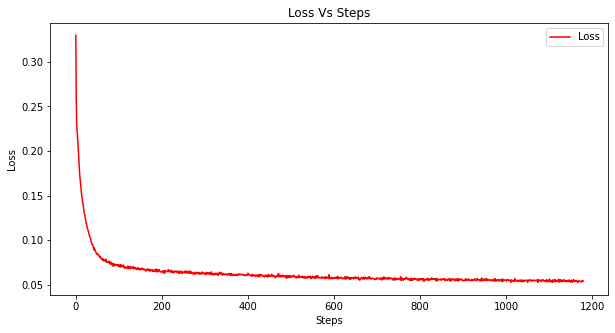

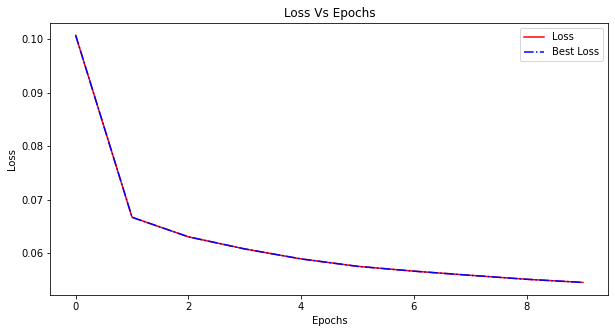

In [127]:
generative_model.eval()
generative_model.plot_loss()

In [128]:
data = dataset.df.copy()
input_data = data.copy()[cnnmodel.feature_input_order]
encoded_values = generative_model.get_encodings(input_data)
encoded_values = [i for i in encoded_values]
data['VAE_ENCODED'] = encoded_values
nnd = NNDescent(np.array(data["VAE_ENCODED"].values.tolist()), metric='euclidean',random_state=42)
nnd.prepare()

In [129]:
factual = data.sample(1).iloc[0]

Nearest 49 neighbors visualization

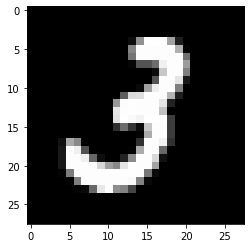

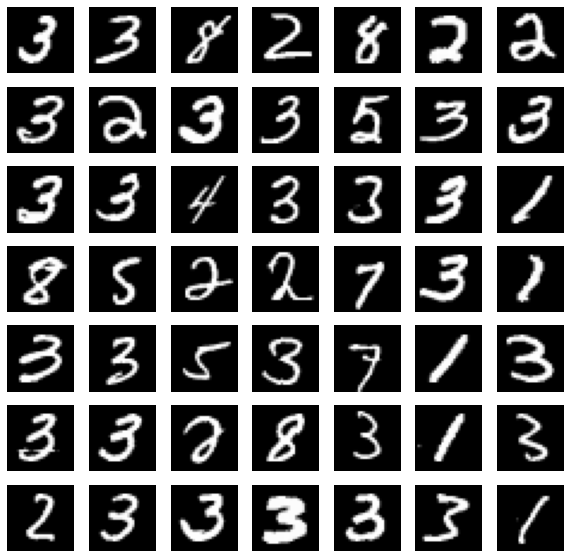

In [130]:
plt.imshow(factual[cnnmodel.feature_input_order].values.reshape(28,28).astype(float), cmap = 'gray')
index_neighbors_0 = nnd.query(np.array([factual["VAE_ENCODED"].tolist()]), k=10000)[0][0].tolist()
datata_index_0 = data.index[index_neighbors_0].tolist()
nnb = data.loc[datata_index_0]
plt.figure(figsize=(10,10))
for i, img in enumerate(nnb[cnnmodel.feature_input_order].head(7*7).values):
    plt.subplot(7, 7, i + 1)
    plt.imshow(img.reshape(28,28).astype(float), cmap = 'gray')
    plt.axis('off')
plt.show()

Sample reconstruction

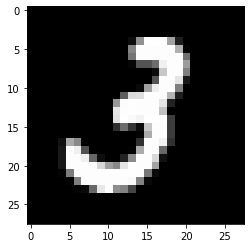

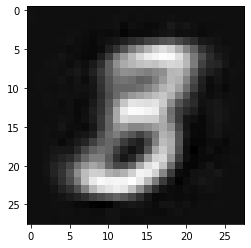

In [133]:
im = factual[cnnmodel.feature_input_order].values
im = im.reshape(1,28*28).astype(float)
im2 = torch.from_numpy(im.reshape(1,28*28)).type(torch.FloatTensor)
im2 = generative_model(im2)[0].detach().numpy().reshape(28,28)
plt.imshow(im.reshape(28,28), cmap = 'gray')
plt.show()
plt.imshow(im2, cmap = 'gray')
plt.show()

## Seems its good, lets start our work

In [136]:
n=28
dataset = MNIST_df.copy()
labels_needed = [5,6]
dataset = dataset[dataset['label'].isin(labels_needed)]
dataset['label'] = dataset['label'].map({5: 0, 6: 1})
from carla import Data, MLModel
from carla.recourse_methods import GrowingSpheres
import pandas as pd
from sklearn.model_selection import train_test_split

# first implement the dataset wrapper
class MnistData(Data):
    def __init__(self):
        # the dataset could be loaded in the constructor
        dataset = MNIST_df.copy()
        labels_needed = [5,6]
        dataset = dataset[dataset['label'].isin(labels_needed)]
        dataset['label'] = dataset['label'].map({5: 0, 6: 1})
        self._dataset = dataset
        for coli in self._dataset.columns:
            if coli == 'label':
                continue
            #self._dataset[coli] = self._dataset[coli] / 255.0
        self._identity_encoding = True
        self.df_train, self.df_test = train_test_split(self._dataset, test_size=0.2)
        self.continuous = []
        # self.categorical = ["pixel_"+str(i)+"_"+str(j) for i in range(n) for j in range(n)]
        self.categorical = [str(i)+"x"+str(j) for i in range(n) for j in range(n)]
        self.immutables = []
        self.target = 'label'
        self.name = 'mnist'
        self.df = self._dataset #.drop(columns=self.target)
        self.catalog = {'categorical': self.categorical,
                      'continuous': self.continuous,
                      'immutable': self.immutables,
                      'target': self.target}
    def categorical(self):
        # this property contains a list of all categorical features
        return self.categorical
    def continuous(self):
        # this property contains a list of all continuous features
        return self.continuous

    def immutables(self):
        # this property contains a list of features which should not be changed by the recourse method
        return self.immutables

    def target(self):
        # this property contains the feature name of the target column
        return self.target

    def raw(self):
        # this property contains the not encoded and not normalized, raw dataset
        return self._dataset

    def df(self):
        return self._dataset
    def df_test(self):
        return self.df_test 

    def df_train(self):
        return self.df_train 
        
    def inverse_transform(self):
        return self._dataset 

    def transform(self):
        return self._dataset
        
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def score_acc(model):
    data = dataset.df
    input_cols = model.feature_input_order
    target_column = dataset.target
    X = data[input_cols]
    y = data[target_column]
    y_pred = model.predict(X)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# load a catalog dataset
dataset = MnistData()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
train_values = dataset.df_train.drop(columns = [dataset.target]).values
train_data = train_values.reshape(len(train_values),28,28,1)
trest_values = dataset.df_test.drop(columns = [dataset.target]).values
test_data = trest_values.reshape(len(trest_values),28,28,1)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
out_classes = dataset.df_train[dataset.target].unique()
print("Length of output is : {}".format(len(out_classes)))
print("Outputs classes are : {}".format(out_classes))
model.add(Dense(len(out_classes),activation=tf.nn.softmax))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_data, dataset.df_train[dataset.target], 
          epochs=2, batch_size=64,
          shuffle=True,
          validation_data=(test_data,  dataset.df_test[dataset.target]))
# second, implement the black-box-model wrapper
class MyOwnModel(MLModel):
    def __init__(self, data, model):
        super().__init__(data)
        # the constructor can be used to load or build an arbitrary black-box-model
        self._mymodel = model
        self.feature_input_order = data.categorical
        # this property contains a fitted scaler to normalize input data
        # MinMaxScaler from sklearn is predefined, but can be redefined by every other sklearn scaler
        # self.scaler = MySklearnScaler().fit()

        # the same is possible for data encoding
        # OneHotEncoder from sklearn with dropped first column for binary data is predefined, but can be
        # changed into any other sklearn encoder.
        # self.encoder = MySklearnEncoder.fit()
    def get_mutable_mask(self):
            return np.ones(len(self.feature_input_order), dtype=bool)
    def feature_input_order(self):
        # this property contains a list of the correct input order of features for the ml model
        return self.feature_input_order

    def backend(self):
        # this property contains a string with the used backend of the model
        return "tensorflow"

    def raw_model(self):
        # this property contains the fitted/ loaded black-box-model
        return self._mymodel

    def predict(self, x): #: Union[np.ndarray, pd.DataFrame]):
        # the predict function outputs the continuous prediction of the model, similar to sklearn.
        return self.predict_proba(x).argmax(axis=1)

    def predict_proba(self, x): #: Union[np.ndarray, pd.DataFrame]):
        if isinstance(x, pd.DataFrame):
          x = x.values
        x = x.reshape(len(x),28,28,1)
        # the predict_proba method outputs the prediction as class probabilities, similar to sklearn
        return self._mymodel.predict(x)
cnnmodel = MyOwnModel(dataset, model)

Start our Cote

In [223]:
hpr = {
      "data_name": "data_name",
      "n_search_samples": 300,
      "p_norm": 1,
      "step": 0.1,
      "max_iter": 10,
      "clamp": True,
      "binary_cat_features": True,
      "myvae_params": {
          'input_dim': 784,
          'layers': [256],
          'latent_dim': 2,
          'hidden_activation': 'relu',
          'dropout': 0.2,
          'batch_norm': True,
          'batch_size': 512,
          'epochs': 120,
          'learning_rate': 0.001,
          'weight_decay': 0.0,
          'kld_weight': 0.00095,
          'cuda': False,
          'verbose': True,
          'train': True,
          'save_dir': './tree_vae_model/',
      },
      "tree_params": {
          "min_entries_per_label": int(trainData.df.shape[0]*0.2),
          "grid_search_jobs": -1,
          "min_weight_gini": 100, # set to 0.5 since here both class have same prob,
          "max_search" : 150,
          "grid_search": {
                "cv": 1,
                "splitter": ["best"],
                "criterion": ["gini"],
                "max_depth": [15],
                "min_samples_split": [3],
                "min_samples_leaf": [1],
                "max_features": [None] #Note changing this will result in removing features that we might want to keep
          }
      }
    }

# Conditions Violations add it at the beginning before going to sampling
# Immutable, e.g. gender imutable all directions
# Age should be greater than x okay, bs decrease 
# Our method take care of those imutability
# 
# Decision tree validation train 
# DOn't cross. validation
# Don't retrain
# Just to retrain
#julia here


# Normilized dataset as the loss was exploding
# Built CNN model for classifier as the LinearRegression was getting 15% accuracy
# The formulation is little different
# Try only two combinations


#VAE good Enough no need for CNN VAE
# SAMPLE points build DT 
# Either tweak parameters or update Tree for 2D Data

# Choose similar classes (4 and 9), (8 and 4)
# Make input binary

tbtest = TreeBasedContrastiveExplanation(dataset, cnnmodel, hpr, data_catalog= new_catalog_n)

{'input_dim': 784, 'kld_weight': 0.00095, 'layers': [256], 'latent_dim': 2, 'hidden_activation': 'relu', 'dropout': 0.2, 'batch_norm': True, 'batch_size': 512, 'epochs': 120, 'learning_rate': 0.001, 'weight_decay': 0.0, 'cuda': False, 'verbose': True, 'train': True, 'save_dir': './tree_vae_model/'}
./tree_vae_model/mnist
VariationalAutoencoder(
  (_encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
  )
  (_mu_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (_log_var_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (_mu_dec): Sequential(
    (0): Sequential(
      (0): Linear(in_features=2, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Drop

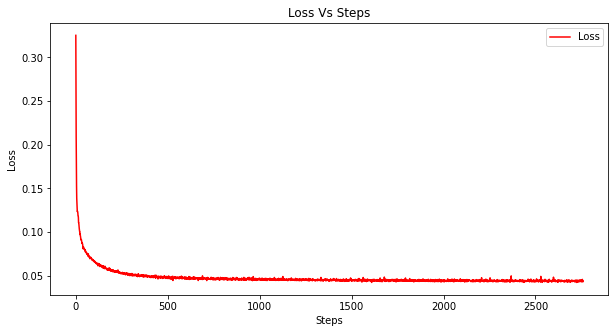

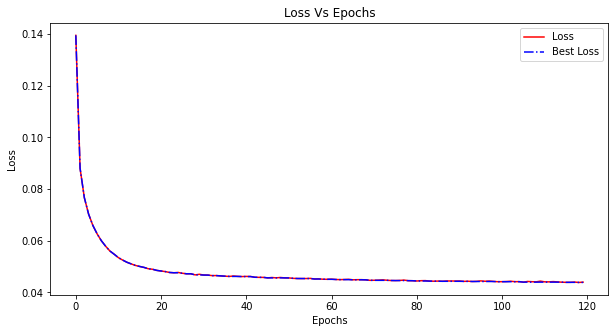

In [224]:
tbtest.vae.plot_loss()

In [225]:
im22 = im2.copy()

In [226]:
factual = factuals.copy().sample(1)

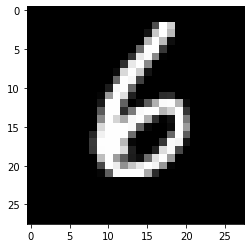

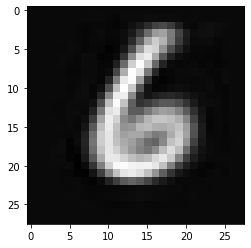

In [227]:
im = factual[cnnmodel.feature_input_order].copy().values[0]
im2 = torch.from_numpy(im.reshape(1,28*28)).type(torch.FloatTensor)
im2 = tbtest.vae(im2)[0].detach().numpy().reshape(28,28)
plt.imshow(im.reshape(28,28), cmap = 'gray')
plt.show()
plt.imshow(im2, cmap = 'gray')
plt.show()

In [228]:
tbtest.get_counterfactuals(factual)

,0x0,0x1,0x2,0x3,0x4,...,27x23,27x24,27x25,27x26,27x27
19157,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


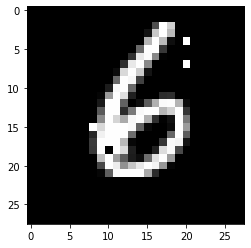

In [229]:
plt.imshow(tbtest.neighb_df[cnnmodel.feature_input_order].values.reshape(28,28).astype(float), cmap = 'gray')

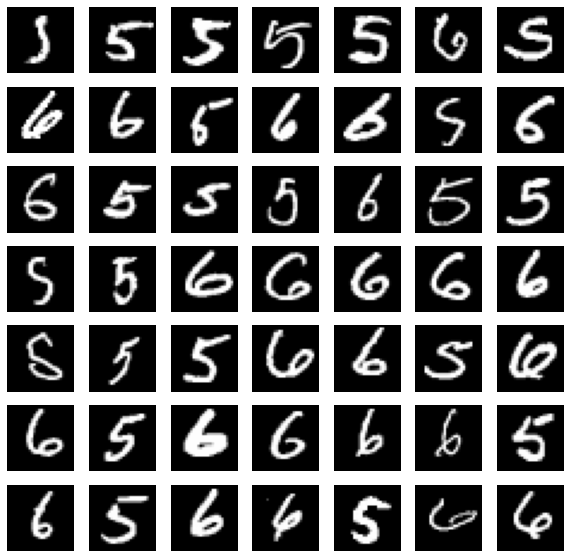

In [230]:
plt.figure(figsize=(10,10))
for i, img in enumerate(tbtest.nnb[cnnmodel.feature_input_order].head(7*7).values):
    plt.subplot(7, 7, i + 1)
    plt.imshow(img.reshape(28,28).astype(float), cmap = 'gray')
    plt.axis('off')
plt.show()

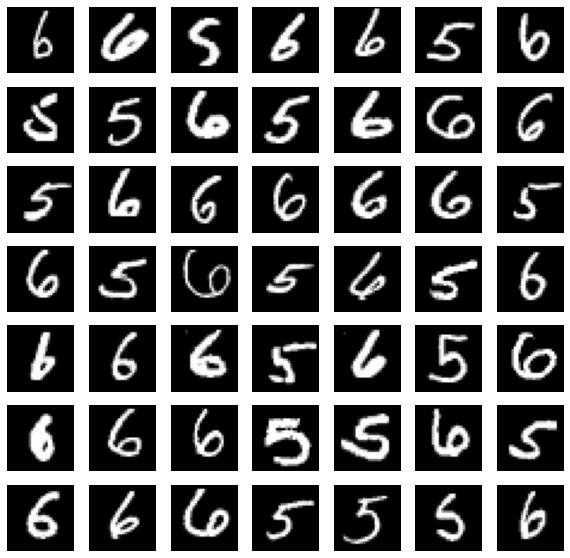

In [231]:
plt.figure(figsize=(10,10))
for i, img in enumerate(tbtest.nnb[cnnmodel.feature_input_order].tail(7*7).values):
    plt.subplot(7, 7, i + 1)
    plt.imshow(img.reshape(28,28).astype(float), cmap = 'gray')
    plt.axis('off')
plt.show()

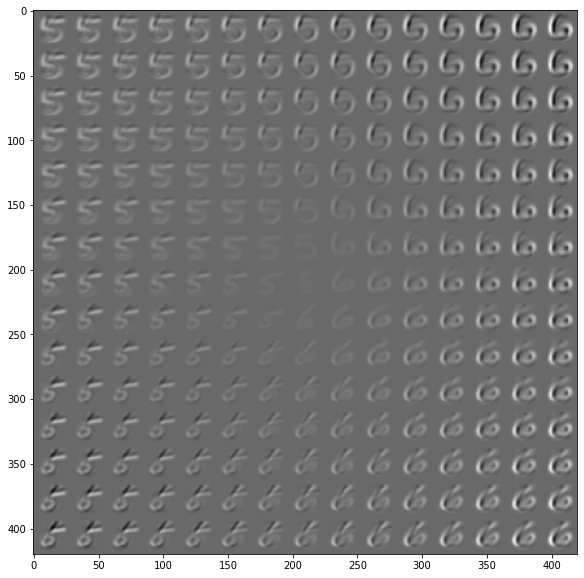

In [232]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = torch.from_numpy(z_sample).type(torch.FloatTensor)
        x_decoded = tbtest.vae.decode(z_sample).detach().numpy()
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap = 'gray')
plt.show()


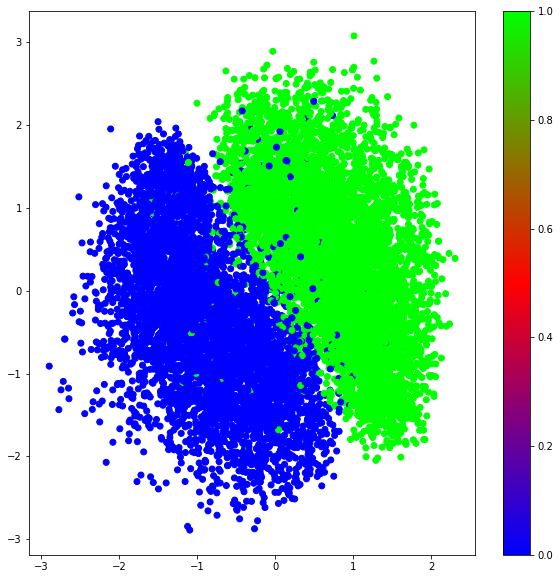

In [233]:
X_valid_encoded = tbtest.vae.get_encodings(dataset.df[cnnmodel.feature_input_order])
plt.figure(figsize=(10, 10))
plt.scatter(X_valid_encoded[:, 0], X_valid_encoded[:, 1], c=dataset.df[dataset.target], cmap='brg')
plt.colorbar()
plt.show()